In [1]:
!pip install opencv-python-headless pandas matplotlib openpyxl

  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_a

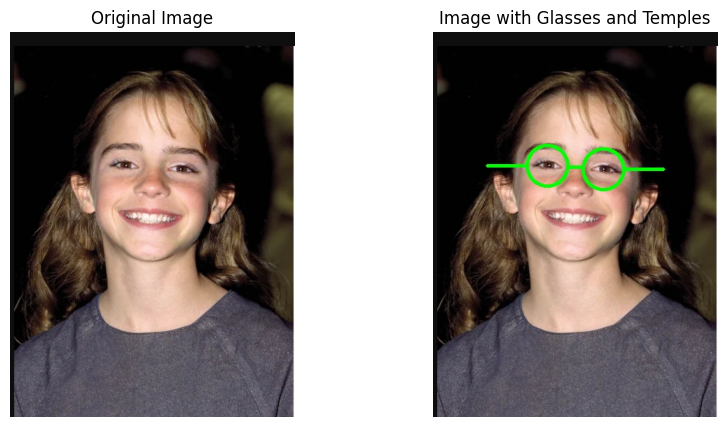

In [14]:
import cv2
import matplotlib.pyplot as plt
 
def add_glasses_with_temple(image_path):
    # Load the image
    image = cv2.imread(image_path)
 
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
    # Load Haar cascades for face and eyes
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
 
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
 
    for (x, y, w, h) in faces:
        # Define the region of interest for the eyes
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = image[y:y + h, x:x + w]
 
        # Detect eyes within the face
        eyes = eye_cascade.detectMultiScale(roi_gray)
 
        # Filter to include only detections in the upper half of the face region
        eye_detections = [eye for eye in eyes if eye[1] < h // 2]
 
        # Draw glasses only if exactly two eyes are detected
        if len(eye_detections) >= 2:
            # Sort by x-position to ensure left-to-right order
            eye_detections = sorted(eye_detections, key=lambda e: e[0])
 
            # Get the centers of each eye
            left_eye = eye_detections[0]
            right_eye = eye_detections[1]
 
            left_eye_center = (x + left_eye[0] + left_eye[2] // 2, y + left_eye[1] + left_eye[3] // 2)
            right_eye_center = (x + right_eye[0] + right_eye[2] // 2, y + right_eye[1] + right_eye[3] // 2)
            radius = max(left_eye[2] // 2, right_eye[2] // 2)
 
            # Define glasses color and thickness
            glasses_color = (0, 255, 0)  # Green
            thickness = 3
 
            # Draw circles around each eye
            cv2.circle(image, left_eye_center, radius, glasses_color, thickness)
            cv2.circle(image, right_eye_center, radius, glasses_color, thickness)
 
            # Draw the bridge of the glasses
            bridge_y = int((left_eye_center[1] + right_eye_center[1]) / 2)
            cv2.line(image, (left_eye_center[0] + radius, bridge_y),
                     (right_eye_center[0] - radius, bridge_y), glasses_color, thickness)
 
            # Draw the temples extending to the sides (simulating the ear pieces)
            temple_length = w // 4  # Length of the temple piece
            cv2.line(image, (left_eye_center[0] - radius, left_eye_center[1]),
                     (left_eye_center[0] - radius - temple_length, left_eye_center[1]), glasses_color, thickness)
            cv2.line(image, (right_eye_center[0] + radius, right_eye_center[1]),
                     (right_eye_center[0] + radius + temple_length, right_eye_center[1]), glasses_color, thickness)
 
    # Save the modified image
    output_path = "output_image_with_glasses_and_temples.jpg"
    cv2.imwrite(output_path, image)
 
    return output_path
 
# Test the function
original_image_path = "emma-watson.jpg"
output_image_path = add_glasses_with_temple(original_image_path)
 
# Display the original and modified images
original_img = cv2.imread(original_image_path)
output_img = cv2.imread(output_image_path)
 
# Convert BGR to RGB for displaying
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
 
# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_rgb)
plt.title("Original Image")
plt.axis('off')
 
plt.subplot(1, 2, 2)
plt.imshow(output_img_rgb)
plt.title("Image with Glasses and Temples")
plt.axis('off')
 
plt.show()